In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Install And Import Python Libraries





In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Step 2: Download And Read Data




In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/processed_novels_sentences_new.csv')

# Step 3: Understanding the Dataset Structure

In [ ]:
# Display the first few rows
df.head()

,Author,Book Title,Chapter,Sentence
0,Ann_Cole,Mr. Mysterious In Black,1,Prologue H e was tired.
1,Ann_Cole,Mr. Mysterious In Black,1,Dog-tired.
2,Ann_Cole,Mr. Mysterious In Black,1,"Amped up by pleasure mere minutes ago, his hea..."
3,Ann_Cole,Mr. Mysterious In Black,1,"Unfortunately, he was yanked back from the bec..."
4,Ann_Cole,Mr. Mysterious In Black,1,"Languid, he opened his eyes to the annoying re..."


In [ ]:
# Get dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680822 entries, 0 to 680821
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Author      680822 non-null  object
 1   Book Title  680822 non-null  object
 2   Chapter     680822 non-null  int64 
 3   Sentence    680822 non-null  object
dtypes: int64(1), object(3)
memory usage: 20.8+ MB


In [ ]:
# Get the shape of the dataset
print(f'Total Rows: {df.shape[0]}')
print(f'Total Columns: {df.shape[1]}')

Total Rows: 680822
Total Columns: 4


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Author,0
Book Title,0
Chapter,0
Sentence,0


In [ ]:
# Display a random sample
df.sample(5)

,Author,Book Title,Chapter,Sentence
234693,Jessica_Clare,Beauty and the Billionaire,8,"And before tonight, he’d have cast aside that ..."
311310,GT_Geissinger,Burn for You,19,She looked .
455142,L_Steele,The Billionaire's Christmas Bride,27,"I lower my chin, hiding behind my thick fall o..."
7313,Ann_Cole,Mr. Mysterious In Black,22,“I’ll arrange a lesson for you on Saturday mor...
116182,Lisa_Kleypas,Blue Eyed Devil,3,"Even though I was safe, I couldn't make myself..."


# Step 4: Descriptive Statistics

# 4.1. Chapters per Book



## Analysis of Chapters per Book (standart deviation)

In [ ]:
# Calculate chapters per book
chapters_per_book = df.groupby(['Author', 'Book Title'])['Chapter'].nunique().reset_index()
chapters_per_book.rename(columns={'Chapter': 'Chapter Count'}, inplace=True)

In [ ]:
# Statistical summary
chapters_stats = chapters_per_book['Chapter Count'].describe()
print(chapters_stats)

count    105.000000
mean      31.895238
std       15.179645
min        4.000000
25%       19.000000
50%       32.000000
75%       43.000000
max       73.000000
Name: Chapter Count, dtype: float64


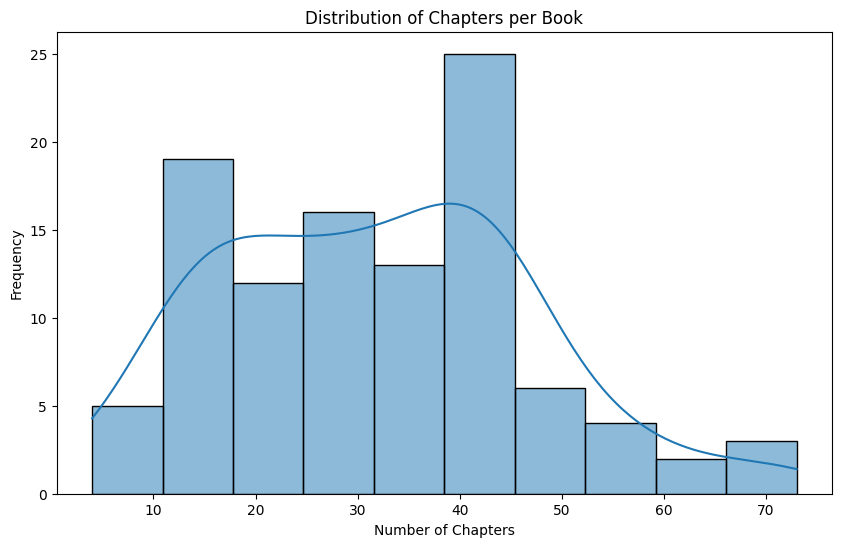

In [ ]:
# Histogram of chapters per book
plt.figure(figsize=(10,6))
sns.histplot(chapters_per_book['Chapter Count'], bins=10, kde=True)
plt.title('Distribution of Chapters per Book')
plt.xlabel('Number of Chapters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate mean and standard deviation
mean_chapters = chapters_per_book['Chapter Count'].mean()
std_chapters = chapters_per_book['Chapter Count'].std()

In [ ]:
# Define the bounds
lower_bound = mean_chapters - 2 * std_chapters
upper_bound = mean_chapters + 2 * std_chapters

# Adjust lower bound if negative
lower_bound = max(0, lower_bound)

In [ ]:
# Identify outlier books
book_outliers = chapters_per_book[
    (chapters_per_book['Chapter Count'] < lower_bound) |
    (chapters_per_book['Chapter Count'] > upper_bound)
]

In [ ]:
# Count the number of outlier books
num_outlier_books = book_outliers.shape[0]
print(f"Number of outlier books: {num_outlier_books}")

# Total number of books
total_books = chapters_per_book.shape[0]

# Calculate percentage
percentage_outliers = (num_outlier_books / total_books) * 100
print(f"Percentage of books that are outliers: {percentage_outliers:.2f}%")

Number of outlier books: 4
Percentage of books that are outliers: 3.81%


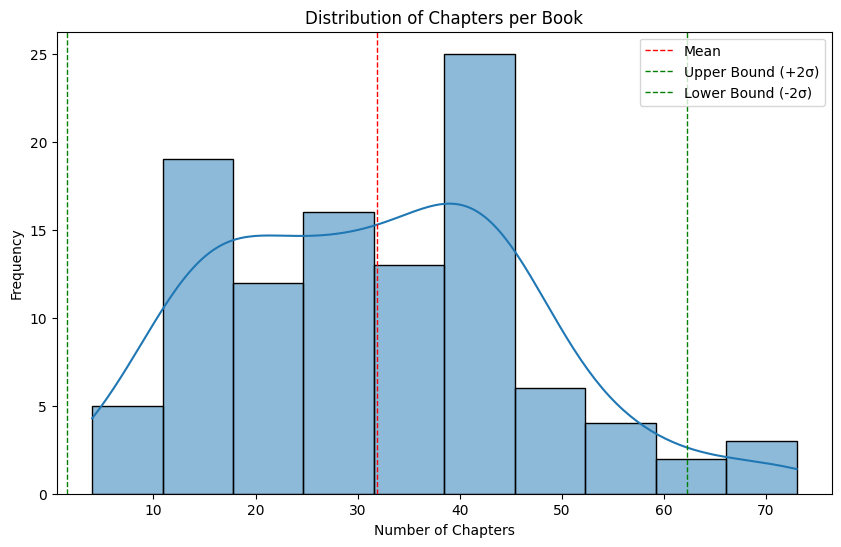

In [ ]:
# Histogram with mean and bounds
plt.figure(figsize=(10,6))
sns.histplot(chapters_per_book['Chapter Count'], bins=10, kde=True)
plt.title('Distribution of Chapters per Book')
plt.xlabel('Number of Chapters')
plt.ylabel('Frequency')

# Add vertical lines for mean and bounds
plt.axvline(mean_chapters, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound (+2σ)')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1, label='Lower Bound (-2σ)')

plt.legend()
plt.show()

In [ ]:
# Books with the most chapters (top 5)
books_most_chapters = chapters_per_book.nlargest(5, 'Chapter Count')
print("Books with the Most Chapters:")
print(books_most_chapters[['Author', 'Book Title', 'Chapter Count']])

Books with the Most Chapters:
             Author                         Book Title  Chapter Count
15  Catharina_Maura                 The Temporary Wife             73
17  Catharina_Maura                    The Wrong Bride             71
16  Catharina_Maura              The Unwanted Marriage             68
54         L_Steele  The Billionaire's Christmas Bride             63
4         Ana_Huang                       Twisted Lies             60


In [ ]:
# Books with the fewest chapters (bottom 5)
books_fewest_chapters = chapters_per_book.nsmallest(5, 'Chapter Count')
print("\nBooks with the Fewest Chapters:")
print(books_fewest_chapters[['Author', 'Book Title', 'Chapter Count']])


Books with the Fewest Chapters:
          Author                  Book Title  Chapter Count
63  Lisa_Kleypas             Blue Eyed Devil              4
65  Lisa_Kleypas                 Sugar Daddy              4
23     Emma_Bray   Unmasking the Billionaire              6
22     Emma_Bray  Stalked by the Billionaire              8
21     Emma_Bray     Her Billionaire Stalker              9


In [ ]:
# Number of outlier books per author
outliers_by_author = book_outliers['Author'].value_counts()
print("\nNumber of Outlier Books per Author:")
print(outliers_by_author)


Number of Outlier Books per Author:
Author
Catharina_Maura    3
L_Steele           1
Name: count, dtype: int64


# Analysis of Chapters per Book (range)

In [ ]:
# Calculate chapters per book
chapters_per_book = df.groupby(['Author', 'Book Title'])['Chapter'].nunique().reset_index()
chapters_per_book.rename(columns={'Chapter': 'Chapter Count'}, inplace=True)

In [ ]:
# Statistical summary
chapters_stats = chapters_per_book['Chapter Count'].describe()
print(chapters_stats)

count    105.000000
mean      31.895238
std       15.179645
min        4.000000
25%       19.000000
50%       32.000000
75%       43.000000
max       73.000000
Name: Chapter Count, dtype: float64


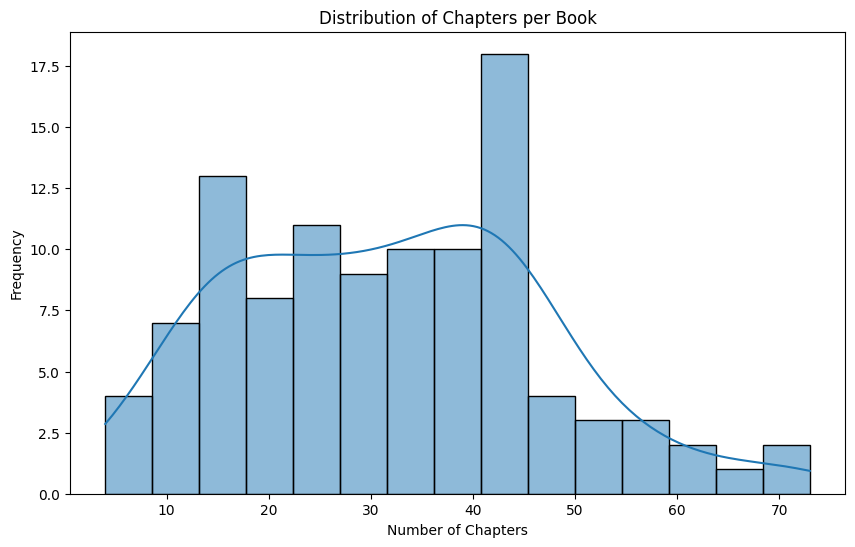

In [ ]:
# Histogram of chapters per book
plt.figure(figsize=(10,6))
sns.histplot(chapters_per_book['Chapter Count'], bins=15, kde=True)
plt.title('Distribution of Chapters per Book')
plt.xlabel('Number of Chapters')
plt.ylabel('Frequency')
plt.show()

# 4.2. Sentences per Chapter

In [ ]:
# Cal# Calculate sentences per chapter
sentences_per_chapter = df.groupby(['Author', 'Book Title', 'Chapter'])['Sentence'].count().reset_index()

# Rename the 'Sentence' column to 'Sentence Count' for clarity
sentences_per_chapter.rename(columns={'Sentence': 'Sentence Count'}, inplace=True)

In [ ]:
# Statistical summary
sentences_stats = sentences_per_chapter['Sentence Count'].describe()
print(sentences_stats)

count    3349.000000
mean      203.291132
std       165.305404
min        11.000000
25%       111.000000
50%       174.000000
75%       255.000000
max      2626.000000
Name: Sentence Count, dtype: float64


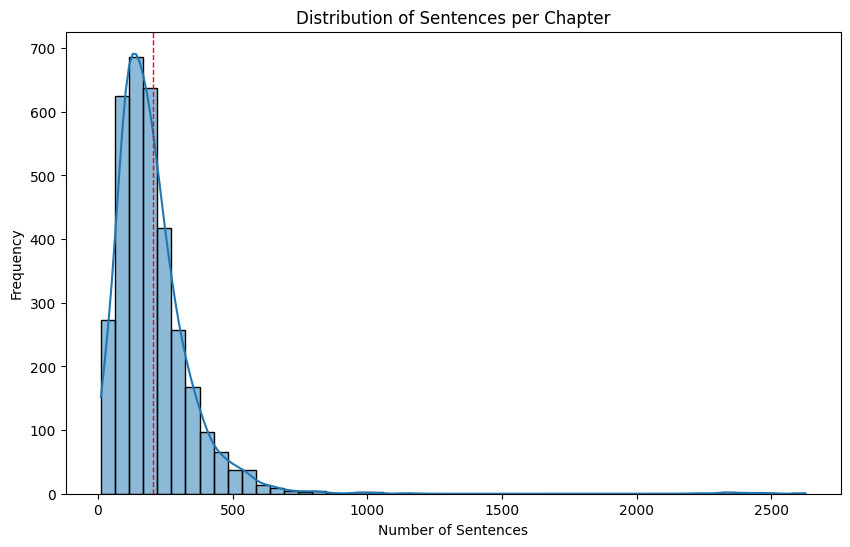

In [ ]:
# Plot distribution of sentences per chapter

# Recalculate sentences per chapter grouped by 'Book Title' and 'Chapter'
sentences_per_chapter = df.groupby(['Book Title', 'Chapter'])['Sentence'].count().reset_index()

# Rename columns for clarity
sentences_per_chapter.columns = ['Book Title', 'Chapter', 'Sentence Count']

# Plot the histogram
plt.figure(figsize=(10,6))
sns.histplot(sentences_per_chapter['Sentence Count'], bins=50, kde=True)
plt.title('Distribution of Sentences per Chapter')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

# Add a vertical line at the mean
plt.axvline(sentences_per_chapter['Sentence Count'].mean(), color='red', linestyle='dashed', linewidth=1)

# Display the plot
plt.show()

# Dealing with Outliers

In [ ]:
# Calculate sentences per chapter (ensuring consistency)
sentences_per_chapter = df.groupby(['Author', 'Book Title', 'Chapter']).size().reset_index(name='Sentence Count')

# Calculate Q1, Q3, and IQR
Q1_chapter = sentences_per_chapter['Sentence Count'].quantile(0.25)
Q3_chapter = sentences_per_chapter['Sentence Count'].quantile(0.75)
IQR_chapter = Q3_chapter - Q1_chapter

# Define the bounds for outliers
lower_bound_chapter = Q1_chapter - 1.5 * IQR_chapter
upper_bound_chapter = Q3_chapter + 1.5 * IQR_chapter

In [ ]:
# Identify outlier chapters
chapter_outliers = sentences_per_chapter[
    (sentences_per_chapter['Sentence Count'] < lower_bound_chapter) |
    (sentences_per_chapter['Sentence Count'] > upper_bound_chapter)
]

In [ ]:
# Count the number of outlier chapters
num_outliers = chapter_outliers.shape[0]
print(f"Number of outlier chapters: {num_outliers}")

Number of outlier chapters: 132


In [ ]:
# Examine outlier chapters
print("Outlier Chapters:")
print(chapter_outliers[['Author', 'Book Title', 'Chapter', 'Sentence Count']])

Outlier Chapters:
            Author               Book Title  Chapter  Sentence Count
44     Alexa_Riley       Everything for Her       24             535
341       Ann_Cole          Love Has a Name       30             483
355       Ann_Cole  Mr. Mysterious In Black       10             479
359       Ann_Cole  Mr. Mysterious In Black       14             580
361       Ann_Cole  Mr. Mysterious In Black       16             525
...            ...                      ...      ...             ...
2704  Sam_Crescent         Billionaire Hero        5             493
3020  Sarina_Bowen             Brooklynaire       13             520
3022  Sarina_Bowen             Brooklynaire       15             529
3025  Sarina_Bowen             Brooklynaire       18             538
3043  Sarina_Bowen              Hard Hitter        2             516

[132 rows x 4 columns]


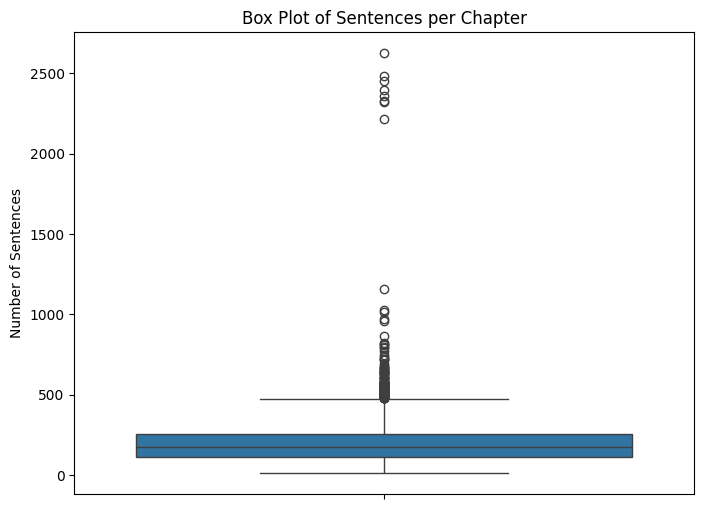

In [ ]:
# Explore distribution to visualize outliers

plt.figure(figsize=(8,6))
sns.boxplot(y=sentences_per_chapter['Sentence Count'])
plt.title('Box Plot of Sentences per Chapter')
plt.ylabel('Number of Sentences')
plt.show()

In [ ]:
# Calculate percentage of data where outliers are present

# Total number of chapters
total_chapters = sentences_per_chapter.shape[0]

# Calculate percentage
percentage_outliers = (num_outliers / total_chapters) * 100
print(f"Percentage of chapters that are outliers: {percentage_outliers:.2f}%")

Percentage of chapters that are outliers: 3.94%


In [ ]:
# Chapters with the most sentences (top 5)
longest_chapters = chapter_outliers.nlargest(5, 'Sentence Count')
print("Chapters with the Most Sentences:")
print(longest_chapters[['Author', 'Book Title', 'Chapter', 'Sentence Count']])

Chapters with the Most Sentences:
            Author       Book Title  Chapter  Sentence Count
2018  Lisa_Kleypas      Sugar Daddy        2            2626
1991  Lisa_Kleypas  Blue Eyed Devil        4            2483
1988  Lisa_Kleypas  Blue Eyed Devil        1            2454
1990  Lisa_Kleypas  Blue Eyed Devil        3            2398
2019  Lisa_Kleypas      Sugar Daddy        3            2359


In [ ]:
# Step 13: Print One of the Largest Chapters Fully

# Select the specific chapter
author = 'Lisa_Kleypas'
book_title = 'Sugar Daddy'
chapter_number = 2

# Filter the DataFrame to get all sentences in the selected chapter
chapter_sentences = df[
    (df['Author'] == author) &
    (df['Book Title'] == book_title) &
    (df['Chapter'] == chapter_number)
].copy()

# Ensure sentences are in the correct order
if 'Sentence Number' in chapter_sentences.columns:
    chapter_sentences.sort_values(by='Sentence Number', inplace=True)
else:
    chapter_sentences.sort_index(inplace=True)

# Concatenate all sentences into a single string
chapter_text = ' '.join(chapter_sentences['Sentence'].tolist())

# Print the full chapter text
print(f"Chapter {chapter_number} of '{book_title}' by {author.replace('_', ' ')}:\n")
print(chapter_text)

Chapter 2 of 'Sugar Daddy' by Lisa Kleypas:

"I'm going to bed," I said. I didn't want to hear her opinion of what was best for me. "I've got a test tomorrow." I went to my room with swift strides and closed the door in a cowardly half-slam, when I should have had the guts to do it full-out. But at least I had the mean, fleeting satisfaction of hearing the baby cry. CHAPTER 8 As the year went on I had begun to measure the passage of time not by the signposts of my own development, but by Carrington's. The first time she rolled over, the first time she sat on her own, ate applesauce mixed with powdered rice, the first haircut, the first tooth. I was the one she always raised her arms to first, giving me a wet gummy grin. It amused and disconcerted Mama at first, and then it became something everyone accepted matter-of-factly. The bond between Carrington and me was closer than that of sisters; it was more like that of parent and child. Not as a result of intention or choice... it simply 

In [ ]:
# Chapters with the fewest sentences (bottom 5)
shortest_chapters = chapter_outliers.nsmallest(5, 'Sentence Count')
print("\nChapters with the Fewest Sentences:")
print(shortest_chapters[['Author', 'Book Title', 'Chapter', 'Sentence Count']])


Chapters with the Fewest Sentences:
             Author                         Book Title  Chapter  \
1094  Jessica_Clare        Stranded with a Billionaire       13   
1534        LJ_Shen                        The Villain       20   
1694       L_Steele  The Billionaire's Christmas Bride       13   
2246   Meghan_Quinn                 A Long Time Coming       15   
355        Ann_Cole            Mr. Mysterious In Black       10   

      Sentence Count  
1094             477  
1534             477  
1694             477  
2246             477  
355              479  


In [ ]:
# Iterate over each chapter in the shortest_chapters DataFrame
for index, row in shortest_chapters.iterrows():
    author = row['Author']
    book_title = row['Book Title']
    chapter_number = row['Chapter']

    # Print a separator for clarity
    print("\n" + "="*80)
    print(f"Chapter {chapter_number} of '{book_title}' by {author.replace('_', ' ')}:")
    print("="*80 + "\n")

    # Filter the DataFrame to get all sentences in the selected chapter
    chapter_sentences = df[
        (df['Author'] == author) &
        (df['Book Title'] == book_title) &
        (df['Chapter'] == chapter_number)
    ].copy()

    # Ensure sentences are in the correct order
    if 'Sentence Number' in chapter_sentences.columns:
        chapter_sentences.sort_values(by='Sentence Number', inplace=True)
    else:
        # If not, sort by the index to maintain the original order
        chapter_sentences.sort_index(inplace=True)

    # Concatenate all sentences into a single string
    chapter_text = ' '.join(chapter_sentences['Sentence'].tolist())

    # Print the full chapter text
    print(chapter_text)


Chapter 13 of 'Stranded with a Billionaire' by Jessica Clare:

Chapter Twelve Logan told Brontë to ask Cooper for the day off on Monday. She asked, with a bemused smile on her face. Cooper was confused about the situation, of course. Since Logan was in the process of buying the coffee shop, and she was dating Logan, did she really have to ask Cooper? Yes, Brontë informed him. She did. She got the day off, of course. When Logan showed up with the limo, she should have been mad at him, but he had such a I-know-I’ve-been-bad smile on his face that she couldn’t get upset. Instead, she eyed the car and then his clothing, noting that despite the expensive wheels, he was dressed down in jeans and a ribbed sweater. “What’s with the limo?” “We need a ride out to where we’re going today.” She crossed her arms but couldn’t keep the smile off her face. “We do, huh?” “We do,” he agreed, and produced a blindfold. “Unless you don’t mind walking the streets blindfolded. This is for you.” Skeptical, B

In [ ]:
# Step: Check if the smallest chapters are the last ones in the books

# Iterate over each chapter in the shortest_chapters DataFrame
for index, row in shortest_chapters.iterrows():
    author = row['Author']
    book_title = row['Book Title']
    chapter_number = row['Chapter']

    # Filter the DataFrame to get all chapters of the book
    book_chapters = df[
        (df['Author'] == author) &
        (df['Book Title'] == book_title)
    ]['Chapter'].unique()

    # Get the total number of chapters in the book
    total_chapters = len(book_chapters)

    # Check if current chapter is the last one
    if chapter_number == max(book_chapters):
        print(f"Chapter {chapter_number} is the last chapter in '{book_title}' by {author.replace('_', ' ')}.")
    else:
        print(f"Chapter {chapter_number} of '{book_title}' by {author.replace('_', ' ')} is not the last chapter. It is chapter {chapter_number} out of {total_chapters}.")

Chapter 13 of 'Stranded with a Billionaire' by Jessica Clare is not the last chapter. It is chapter 13 out of 17.
Chapter 20 of 'The Villain' by LJ Shen is not the last chapter. It is chapter 20 out of 31.
Chapter 13 of 'The Billionaire's Christmas Bride' by L Steele is not the last chapter. It is chapter 13 out of 63.
Chapter 15 of 'A Long Time Coming' by Meghan Quinn is not the last chapter. It is chapter 15 out of 26.
Chapter 10 of 'Mr. Mysterious In Black' by Ann Cole is not the last chapter. It is chapter 10 out of 28.


In [ ]:
# Number of outlier chapters per author
outliers_by_author = chapter_outliers['Author'].value_counts()
print("\nNumber of Outlier Chapters per Author:")
print(outliers_by_author)


Number of Outlier Chapters per Author:
Author
Meghan_Quinn       22
LT_Swan            18
LJ_Shen            16
Lisa_Kleypas       16
Jessica_Clare      15
Jennifer_Probst    11
Kendra_Little       7
L_Steele            6
Ann_Cole            5
Sarina_Bowen        4
Annika_Martin       4
Penny_Wylder        2
Katy_Evans          1
Jessica_Lemmon      1
GT_Geissinger       1
Max_Monroe          1
Sam_Crescent        1
Alexa_Riley         1
Name: count, dtype: int64


In [ ]:
# Number of outlier chapters per book
outliers_by_book = chapter_outliers['Book Title'].value_counts()
print("\nNumber of Outlier Chapters per Book:")
print(outliers_by_book)


Number of Outlier Chapters per Book:
Book Title
The Monster                            9
A Long Time Coming                     9
The Stopover                           9
Smooth Talking Stranger                8
Bedding the Billionaire                7
The Takeover                           7
A Not So Meet Cute                     7
So Not Meant To Be                     6
The Marriage Trap                      5
Beauty and the Billionaire             5
Stranded with a Billionaire            5
The Wrong Billionaire's Bed            5
The Marriage Bargain                   5
The Villain                            5
Sugar Daddy                            4
Blue Eyed Devil                        4
Mr. Mysterious In Black                4
Brooklynaire                           3
The Billionaire's Secret               3
The Billionaire's Christmas Bride      3
The Billionaire’s Virgin               2
The Hunter                             2
The Casanova                           2
Most Eli

In [ ]:
# Calculate sentence lengths
df['Sentence Length'] = df['Sentence'].apply(lambda x: len(str(x).split()))

# Calculate average sentence length per chapter
avg_sentence_length_per_chapter = df.groupby(['Author', 'Book Title', 'Chapter'])['Sentence Length'].mean().reset_index()
avg_sentence_length_per_chapter.rename(columns={'Sentence Length': 'Average Sentence Length'}, inplace=True)

# Merge average sentence length with chapter data
chapter_outliers = chapter_outliers.merge(avg_sentence_length_per_chapter, on=['Author', 'Book Title', 'Chapter'])

In [ ]:
# For chapters with extremely high sentence counts, check if sentences are unusually short
high_sentence_count_chapters = longest_chapters.copy()

# Merge with average sentence length
high_sentence_count_chapters = high_sentence_count_chapters.merge(avg_sentence_length_per_chapter, on=['Author', 'Book Title', 'Chapter'])

print("\nDetails of Chapters with Extremely High Sentence Counts:")
print(high_sentence_count_chapters[['Author', 'Book Title', 'Chapter', 'Sentence Count', 'Average Sentence Length']])


Details of Chapters with Extremely High Sentence Counts:
         Author       Book Title  Chapter  Sentence Count  \
0  Lisa_Kleypas      Sugar Daddy        2            2626   
1  Lisa_Kleypas  Blue Eyed Devil        4            2483   
2  Lisa_Kleypas  Blue Eyed Devil        1            2454   
3  Lisa_Kleypas  Blue Eyed Devil        3            2398   
4  Lisa_Kleypas      Sugar Daddy        3            2359   

   Average Sentence Length  
0                12.472963  
1                 9.723721  
2                10.898126  
3                 9.431193  
4                10.786350  


In [ ]:
# For chapters with extremely low sentence counts, check if sentences are unusually long
low_sentence_count_chapters = shortest_chapters.copy()

# Merge with average sentence length
low_sentence_count_chapters = low_sentence_count_chapters.merge(avg_sentence_length_per_chapter, on=['Author', 'Book Title', 'Chapter'])

print("\nDetails of Chapters with Extremely Low Sentence Counts:")
print(low_sentence_count_chapters[['Author', 'Book Title', 'Chapter', 'Sentence Count', 'Average Sentence Length']])


Details of Chapters with Extremely Low Sentence Counts:
          Author                         Book Title  Chapter  Sentence Count  \
0  Jessica_Clare        Stranded with a Billionaire       13             477   
1        LJ_Shen                        The Villain       20             477   
2       L_Steele  The Billionaire's Christmas Bride       13             477   
3   Meghan_Quinn                 A Long Time Coming       15             477   
4       Ann_Cole            Mr. Mysterious In Black       10             479   

   Average Sentence Length  
0                13.341719  
1                11.658281  
2                 8.006289  
3                11.851153  
4                11.910230  


In [ ]:
# Thresholds for sentence lengths (e.g., sentences longer than 100 words)
long_sentence_threshold = 100

# Find sentences longer than the threshold in outlier chapters
long_sentences_in_outliers = df[
    (df['Sentence Length'] > long_sentence_threshold) &
    (df['Author'].isin(chapter_outliers['Author'])) &
    (df['Book Title'].isin(chapter_outliers['Book Title'])) &
    (df['Chapter'].isin(chapter_outliers['Chapter']))
]

print("\nSentences Longer than 100 Words in Outlier Chapters:")
print(long_sentences_in_outliers[['Author', 'Book Title', 'Chapter', 'Sentence', 'Sentence Length']])


Sentences Longer than 100 Words in Outlier Chapters:
                 Author            Book Title  Chapter  \
38468      Meghan_Quinn    A Long Time Coming        6   
39194      Meghan_Quinn    A Long Time Coming        7   
52935      Meghan_Quinn    So Not Meant To Be       17   
56981      Meghan_Quinn    So Not Meant To Be       26   
308323    GT_Geissinger          Burn for You        1   
308617    GT_Geissinger          Burn for You        1   
308683    GT_Geissinger          Burn for You        1   
308933    GT_Geissinger          Burn for You        2   
310745    GT_Geissinger          Burn for You       15   
313120    GT_Geissinger          Burn for You       31   
477978  Jennifer_Probst  The Marriage Bargain        1   
617822          LJ_Shen           The Monster        3   

                                                 Sentence  Sentence Length  
38468   Who knows, maybe she’ll become a fanatic like ...              101  
39194   Like when we go to meals with

In [ ]:
# Find sentences without periods in outlier chapters
sentences_without_period = df[
    (~df['Sentence'].str.contains('\.')) &
    (df['Author'].isin(chapter_outliers['Author'])) &
    (df['Book Title'].isin(chapter_outliers['Book Title'])) &
    (df['Chapter'].isin(chapter_outliers['Chapter']))
]

print("\nSentences Without Periods in Outlier Chapters:")
print(sentences_without_period[['Author', 'Book Title', 'Chapter', 'Sentence']])


Sentences Without Periods in Outlier Chapters:
            Author               Book Title  Chapter  \
29        Ann_Cole  Mr. Mysterious In Black        1   
34        Ann_Cole  Mr. Mysterious In Black        1   
36        Ann_Cole  Mr. Mysterious In Black        1   
57        Ann_Cole  Mr. Mysterious In Black        1   
73        Ann_Cole  Mr. Mysterious In Black        1   
...            ...                      ...      ...   
647677  Katy_Evans                    Mogul       24   
647694  Katy_Evans                    Mogul       24   
647749  Katy_Evans                    Mogul       24   
647757  Katy_Evans                    Mogul       25   
647771  Katy_Evans                    Mogul       25   

                                                 Sentence  
29                 “Get the hell up and get going, woman!  
34                                       How much longer?  
36      How much longer would it be before he could re...  
57                                  “Ra

In [ ]:
# Step 1: Ensure 'Sentence Length' column exists
if 'Sentence Length' not in df.columns:
    df['Sentence Length'] = df['Sentence'].apply(lambda x: len(str(x).split()))

# Step 2: Assign 'Sentence Number' within each chapter
df = df.sort_values(by=['Author', 'Book Title', 'Chapter']).reset_index(drop=True)
df['Sentence Number'] = df.groupby(['Author', 'Book Title', 'Chapter']).cumcount() + 1

# Step 3: Calculate total sentences per chapter
sentences_per_chapter = df.groupby(['Author', 'Book Title', 'Chapter'])['Sentence'].count().reset_index()
sentences_per_chapter.rename(columns={'Sentence': 'Total Sentences'}, inplace=True)
df = df.merge(sentences_per_chapter, on=['Author', 'Book Title', 'Chapter'], how='left')

# Step 4: Identify long sentences in outlier chapters
long_sentence_threshold = 100
long_sentences_in_outliers = df[
    (df['Sentence Length'] > long_sentence_threshold) &
    (df['Author'].isin(chapter_outliers['Author'])) &
    (df['Book Title'].isin(chapter_outliers['Book Title'])) &
    (df['Chapter'].isin(chapter_outliers['Chapter']))
].copy()

# Step 5: Determine if each long sentence is the last in its chapter
long_sentences_in_outliers['Is Last Sentence'] = (
    long_sentences_in_outliers['Sentence Number'] == long_sentences_in_outliers['Total Sentences']
)

# Step 6: Print the results
print("\nSentences Longer than 100 Words in Outlier Chapters:")
for idx, row in long_sentences_in_outliers.iterrows():
    author = row['Author'].replace('_', ' ')
    book_title = row['Book Title']
    chapter_number = row['Chapter']
    sentence_number = row['Sentence Number']
    total_sentences = row['Total Sentences']
    is_last_sentence = row['Is Last Sentence']
    sentence_length = row['Sentence Length']
    sentence_text = row['Sentence']

    if is_last_sentence:
        print(f"Sentence {sentence_number} is the last sentence in Chapter {chapter_number} of '{book_title}' by {author}.")
    else:
        print(f"Sentence {sentence_number} of {total_sentences} in Chapter {chapter_number} of '{book_title}' by {author}.")

    print(f"Sentence Length: {sentence_length} words")
    print(f"Sentence Text: {sentence_text}\n")


Sentences Longer than 100 Words in Outlier Chapters:
Sentence 9 of 547 in Chapter 1 of 'Burn for You' by GT Geissinger.
Sentence Length: 142 words
Sentence Text: CONTENTS ONE BIANCA TWO BIANCA THREE JACKSON FOUR BIANCA CREOLE SHRIMP AND GRITS FIVE JACKSON SIX BIANCA SEVEN BIANCA EIGHT BIANCA BIANCA’S OLD CUBAN NINE JACKSON TEN BIANCA ELEVEN BIANCA GINGER-ORANGE CHEESECAKE TWELVE BIANCA THIRTEEN JACKSON FOURTEEN BIANCA BIANCA’S BLACKBERRY & BOURBON COBBLER FIFTEEN JACKSON SIXTEEN BIANCA SEVENTEEN BIANCA EIGHTEEN JACKSON FRENCH QUARTER BEIGNETS NINETEEN BIANCA TWENTY BIANCA TWENTY-ONE BIANCA DAVINA’S FAMOUS CREOLE JAMBALAYA TWENTY-TWO BIANCA TWENTY-THREE JACKSON TWENTY-FOUR BIANCA TWENTY-FIVE BIANCA TWENTY-SIX BIANCA TWENTY-SEVEN JACKSON CREOLE OKRA GUMBO TWENTY-EIGHT BIANCA TWENTY-NINE BIANCA THIRTY BIANCA THIRTY-ONE JACKSON THIRTY-TWO BIANCA THIRTY-THREE JACKSON BLOODY DIXIE THIRTY-FOUR BIANCA THIRTY-FIVE JACKSON THIRTY-SIX BIANCA THIRTY-SEVEN BIANCA THIRTY-EIGHT JACKSON SLAP, SLAP, K

In [ ]:
# Calculate the average sentence count per chapter for each author
author_chapter_stats = sentences_per_chapter.groupby('Author')['Sentence Count'].agg(['mean', 'median', 'std']).reset_index()
print("\nAverage Sentence Count per Chapter by Author:")
print(author_chapter_stats)


Average Sentence Count per Chapter by Author:
             Author        mean  median         std
0       Alexa_Riley  130.843478   123.0   82.241257
1         Ana_Huang  165.246753   164.0   74.782151
2          Ann_Cole  254.161905   270.0  122.341744
3       Anne_Melody  218.744186   232.0   95.907717
4     Annika_Martin  193.321429   155.5  132.144012
5   Catharina_Maura  112.278302   107.0   29.177556
6     Diane_Alberts  182.800000   174.0   78.321692
7         Emma_Bray  151.347826   140.0   63.981253
8     GT_Geissinger  181.598361   192.0   74.345148
9          JS_Scott  223.661538   233.0   69.346791
10  Jennifer_Probst  288.958333   272.0  211.853518
11    Jessica_Clare  393.509804   380.0  245.868613
12   Jessica_Lemmon  260.987500   288.5  120.720987
13         KA_Linde  181.837398   187.0   46.806608
14       Katy_Evans  158.284091   143.5  101.841769
15    Kendra_Little  332.641509   307.0  116.429592
16          LJ_Shen  317.528736   307.0  181.274034
17          LT_Sw

# Analyzing Outliers Using the Standard Deviation Method

In [ ]:
# Calculate sentences per chapter
sentences_per_chapter = df.groupby(['Author', 'Book Title', 'Chapter'])['Sentence'].count().reset_index()
sentences_per_chapter.rename(columns={'Sentence': 'Sentence Count'}, inplace=True)

In [ ]:
# Statistical summary
sentences_stats = sentences_per_chapter['Sentence Count'].describe()
print(sentences_stats)

count    3349.000000
mean      203.291132
std       165.305404
min        11.000000
25%       111.000000
50%       174.000000
75%       255.000000
max      2626.000000
Name: Sentence Count, dtype: float64


In [ ]:
# Calculate mean and standard deviation
mean_sentences = sentences_per_chapter['Sentence Count'].mean()
std_sentences = sentences_per_chapter['Sentence Count'].std()

In [ ]:
# Define the bounds
lower_bound_chapter = mean_sentences - 2 * std_sentences
upper_bound_chapter = mean_sentences + 2 * std_sentences

In [ ]:
# Adjust lower bound if negative
lower_bound_chapter = max(0, lower_bound_chapter)

In [ ]:
# Identify outlier chapters
chapter_outliers = sentences_per_chapter[
    (sentences_per_chapter['Sentence Count'] < lower_bound_chapter) |
    (sentences_per_chapter['Sentence Count'] > upper_bound_chapter)
]

In [ ]:
# Count the number of outlier chapters
num_outliers = chapter_outliers.shape[0]
print(f"Number of outlier chapters: {num_outliers}")

Number of outlier chapters: 85


In [ ]:
# Total number of chapters
total_chapters = sentences_per_chapter.shape[0]

# Calculate percentage
percentage_outliers = (num_outliers / total_chapters) * 100
print(f"Percentage of chapters that are outliers: {percentage_outliers:.2f}%")

Percentage of chapters that are outliers: 2.54%


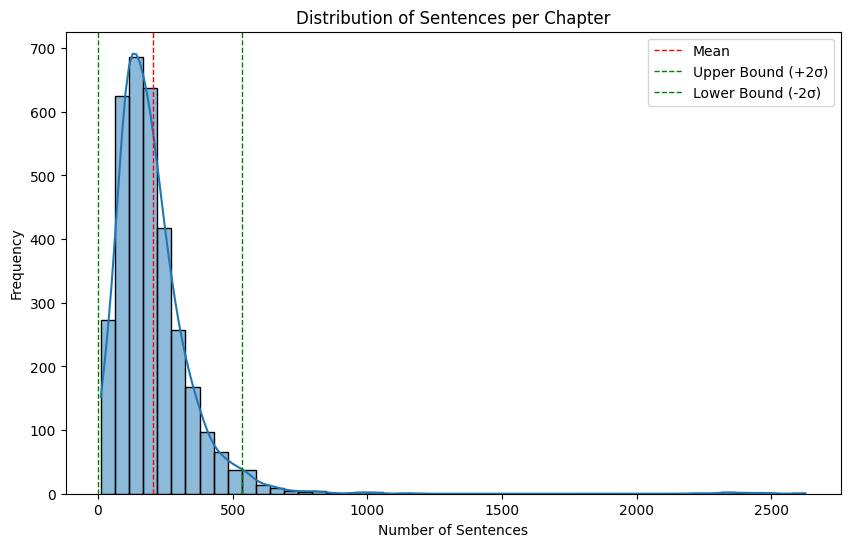

In [ ]:
# Plot distribution of sentences per chapter
plt.figure(figsize=(10,6))
sns.histplot(sentences_per_chapter['Sentence Count'], bins=50, kde=True)
plt.title('Distribution of Sentences per Chapter')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

# Add vertical lines for mean and bounds
plt.axvline(mean_sentences, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(upper_bound_chapter, color='green', linestyle='dashed', linewidth=1, label='Upper Bound (+2σ)')
plt.axvline(lower_bound_chapter, color='green', linestyle='dashed', linewidth=1, label='Lower Bound (-2σ)')

plt.legend()
plt.show()

In [ ]:
# Chapters with the most sentences (top 5)
longest_chapters = chapter_outliers.nlargest(5, 'Sentence Count')
print("Chapters with the Most Sentences:")
print(longest_chapters[['Author', 'Book Title', 'Chapter', 'Sentence Count']])

Chapters with the Most Sentences:
            Author       Book Title  Chapter  Sentence Count
2018  Lisa_Kleypas      Sugar Daddy        2            2626
1991  Lisa_Kleypas  Blue Eyed Devil        4            2483
1988  Lisa_Kleypas  Blue Eyed Devil        1            2454
1990  Lisa_Kleypas  Blue Eyed Devil        3            2398
2019  Lisa_Kleypas      Sugar Daddy        3            2359


In [ ]:
# Chapters with the fewest sentences (bottom 5)
shortest_chapters = chapter_outliers.nsmallest(5, 'Sentence Count')
print("\nChapters with the Fewest Sentences:")
print(shortest_chapters[['Author', 'Book Title', 'Chapter', 'Sentence Count']])


Chapters with the Fewest Sentences:
             Author               Book Title  Chapter  Sentence Count
1413  Kendra_Little  Bedding the Billionaire        8             534
44      Alexa_Riley       Everything for Her       24             535
1618        LT_Swan             The Stopover       17             537
1530        LJ_Shen              The Villain       16             538
3025   Sarina_Bowen             Brooklynaire       18             538


In [ ]:
# Number of outlier chapters per author
outliers_by_author = chapter_outliers['Author'].value_counts()
print("\nNumber of Outlier Chapters per Author:")
print(outliers_by_author)


Number of Outlier Chapters per Author:
Author
Lisa_Kleypas       15
Meghan_Quinn       15
LT_Swan            12
Jessica_Clare      10
LJ_Shen             9
Jennifer_Probst     7
Kendra_Little       4
Annika_Martin       3
L_Steele            3
Ann_Cole            2
Alexa_Riley         1
GT_Geissinger       1
Max_Monroe          1
Penny_Wylder        1
Sarina_Bowen        1
Name: count, dtype: int64


In [ ]:
# Number of outlier chapters per book
outliers_by_book = chapter_outliers['Book Title'].value_counts()
print("\nNumber of Outlier Chapters per Book:")
print(outliers_by_book)


Number of Outlier Chapters per Book:
Book Title
Smooth Talking Stranger                7
The Stopover                           7
The Takeover                           5
So Not Meant To Be                     5
A Not So Meet Cute                     5
The Monster                            5
A Long Time Coming                     5
Sugar Daddy                            4
Blue Eyed Devil                        4
Bedding the Billionaire                4
The Wrong Billionaire's Bed            4
Beauty and the Billionaire             4
The Marriage Trap                      3
The Marriage Bargain                   3
The Villain                            3
Stranded with a Billionaire            2
Mr. Mysterious In Black                2
The Billionaire's Secret               2
Most Eligible Billionaire              2
The Billionaire’s Virgin               1
Banking the Billionaire                1
Everything for Her                     1
The Billionaire's Christmas Bride      1
The Hunt

# **Using Log Scales for Skewed Data**

To better represent the skewed data and understand the distribution of sentences per chapter, we'll implement the following visualization enhancements:

*   Use log scales for visualizations to better represent skewed data.
*   Incorporate cumulative distribution functions (CDF) to understand the proportion of chapters below a certain length.

By implementing logarithmic scales and cumulative distribution functions in our visualizations, we gain a more nuanced understanding of the distribution of sentences per chapter:

* Logarithmic scales help visualize skewed data by spreading out the lower values and compressing the higher values, making patterns more discernible.
* CDF plots allow us to see the cumulative probability and easily determine the proportion of chapters below any given sentence count.

**Using Log Scales for Skewed Data**

The distribution of sentences per chapter is right-skewed, with a long tail of chapters having a high number of sentences. Applying a logarithmic scale can help visualize this data more effectively.

The plot will show the frequency of chapters for each sentence count bin on a logarithmic scale, highlighting the distribution across a wide range of sentence counts.

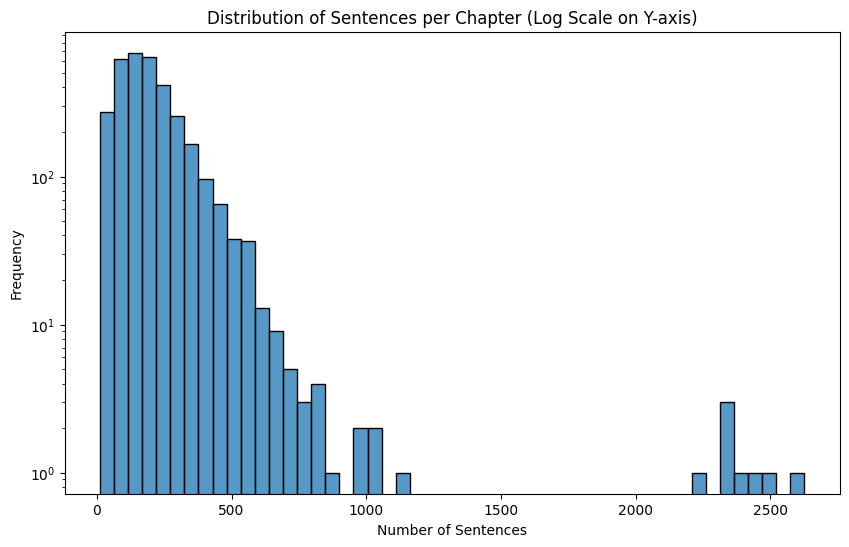

In [ ]:
# Plotting the histogram with a logarithmic y-axis
plt.figure(figsize=(10,6))
sns.histplot(sentences_per_chapter['Sentence Count'], bins=50, kde=False)
plt.title('Distribution of Sentences per Chapter (Log Scale on Y-axis)')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

**Histogram of Log-Transformed Data**

Alternatively, we can apply a logarithmic transformation to the data itself.

The histogram will display the distribution of the log-transformed sentence counts, providing a clearer view of the data's structure.

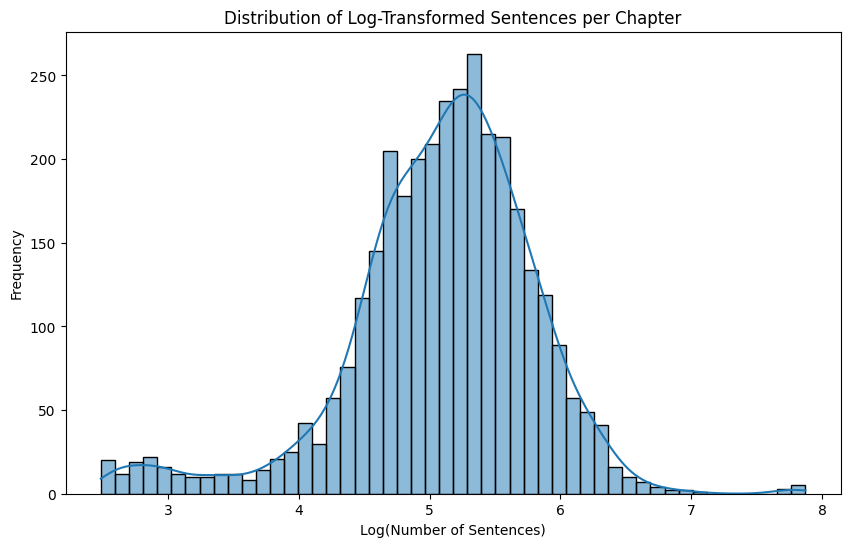

In [ ]:
import numpy as np

# Apply log transformation to the sentence counts
sentences_per_chapter['Log Sentence Count'] = np.log1p(sentences_per_chapter['Sentence Count'])

# Plotting the histogram of log-transformed sentence counts
plt.figure(figsize=(10,6))
sns.histplot(sentences_per_chapter['Log Sentence Count'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Sentences per Chapter')
plt.xlabel('Log(Number of Sentences)')
plt.ylabel('Frequency')
plt.show()

**Incorporating Cumulative Distribution Functions (CDF)**

A cumulative distribution function (CDF) shows the proportion of data points that fall below a particular value, providing insights into the overall distribution.

The CDF plot shows the cumulative probability against the number of sentences per chapter, allowing us to see what proportion of chapters have a sentence count below any given value.

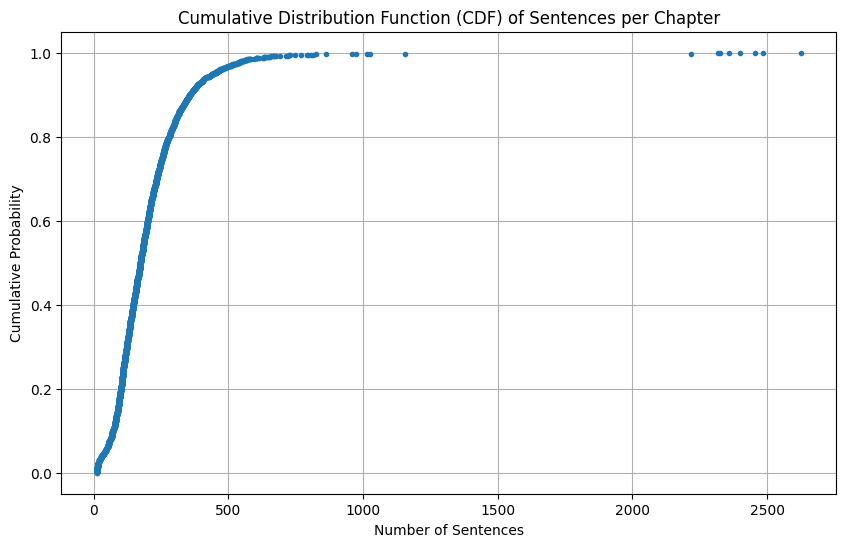

In [ ]:
# Sort the sentence counts
sorted_counts = np.sort(sentences_per_chapter['Sentence Count'])

# Calculate cumulative probabilities
cumulative_probs = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)

# Plot the CDF
plt.figure(figsize=(10,6))
plt.plot(sorted_counts, cumulative_probs, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF) of Sentences per Chapter')
plt.xlabel('Number of Sentences')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

**Interpreting the CDF**

We can use the CDF to find out the proportion of chapters below certain sentence counts.

In [ ]:
# Function to find proportion of chapters below a given sentence count
def proportion_below(count):
    index = np.searchsorted(sorted_counts, count, side='right')
    proportion = cumulative_probs[index - 1] if index > 0 else 0
    return proportion

# Example: Proportion of chapters with fewer than 500 sentences
threshold = 500
proportion = proportion_below(threshold)
print(f"Proportion of chapters with fewer than {threshold} sentences: {proportion:.2%}")

Proportion of chapters with fewer than 500 sentences: 96.78%


**Plotting CDF with Logarithmic X-Axis**

Combining both enhancements, we can plot the CDF with a logarithmic x-axis.

The CDF plot with a logarithmic x-axis provides a clearer view of the distribution of chapters across varying sentence counts, particularly highlighting the lower end of the scale.

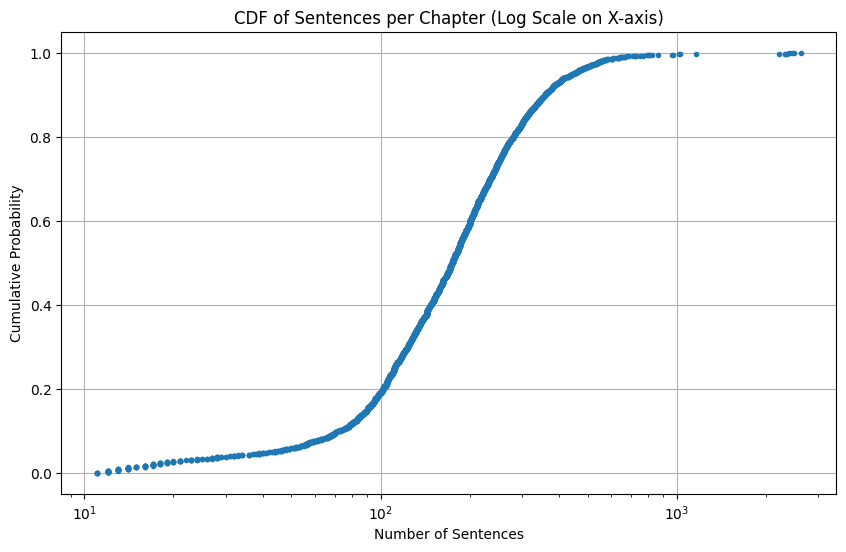

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(sorted_counts, cumulative_probs, marker='.', linestyle='none')
plt.title('CDF of Sentences per Chapter (Log Scale on X-axis)')
plt.xlabel('Number of Sentences')
plt.ylabel('Cumulative Probability')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.grid(True)
plt.show()

# 4.3. Sentence Length (Number of Words)

In [ ]:
# Calculate sentence lengths
df['Sentence Length'] = df['Sentence'].apply(lambda x: len(str(x).split()))

In [ ]:
# Statistical summary
sentence_length_stats = df['Sentence Length'].describe()
print(sentence_length_stats)

count    680822.000000
mean         12.536795
std           8.960698
min           1.000000
25%           6.000000
50%          11.000000
75%          17.000000
max         156.000000
Name: Sentence Length, dtype: float64


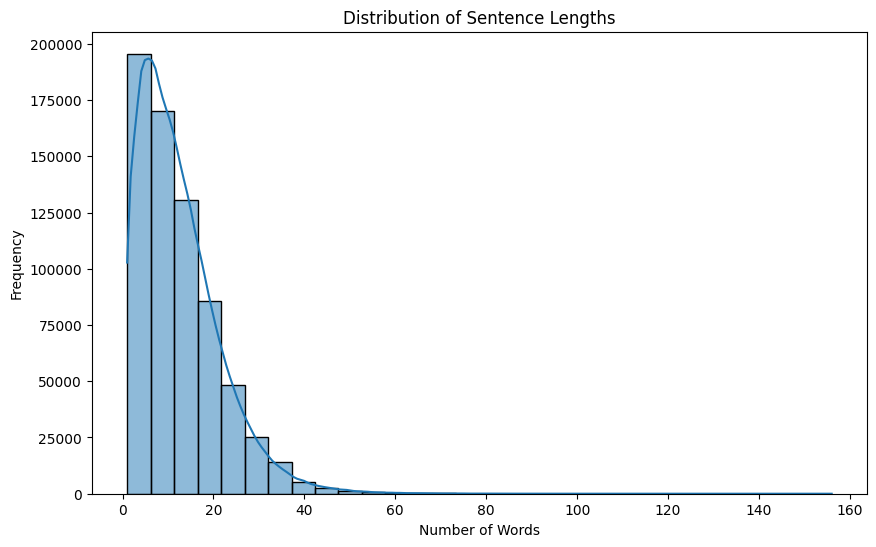

In [ ]:
# Histogram of sentence lengths
plt.figure(figsize=(10,6))
sns.histplot(df['Sentence Length'], bins=30, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Assuming 'Sentence Length' column exists
Q1 = df['Sentence Length'].quantile(0.25)
Q3 = df['Sentence Length'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Calculate mean and standard deviation
mean_sentence_length = df['Sentence Length'].mean()
std_sentence_length = df['Sentence Length'].std()

In [ ]:
# Define the bounds
lower_bound_sentence = mean_sentence_length - 2 * std_sentence_length
upper_bound_sentence = mean_sentence_length + 2 * std_sentence_length

In [ ]:
# Adjust lower bound if less than 1
lower_bound_sentence = max(1, lower_bound_sentence)

In [ ]:
# Identify outlier sentences
sentence_outliers = df[
    (df['Sentence Length'] < lower_bound_sentence) |
    (df['Sentence Length'] > upper_bound_sentence)
]

In [ ]:
# Count the number of outlier sentences
num_sentence_outliers = sentence_outliers.shape[0]
print(f"Number of sentence length outliers: {num_sentence_outliers}")

Number of sentence length outliers: 29022


In [ ]:
# Total number of sentences
total_sentences = df.shape[0]

# Calculate percentage
percentage_outliers = (num_sentence_outliers / total_sentences) * 100
print(f"Percentage of sentences that are outliers: {percentage_outliers:.2f}%")

Percentage of sentences that are outliers: 4.26%


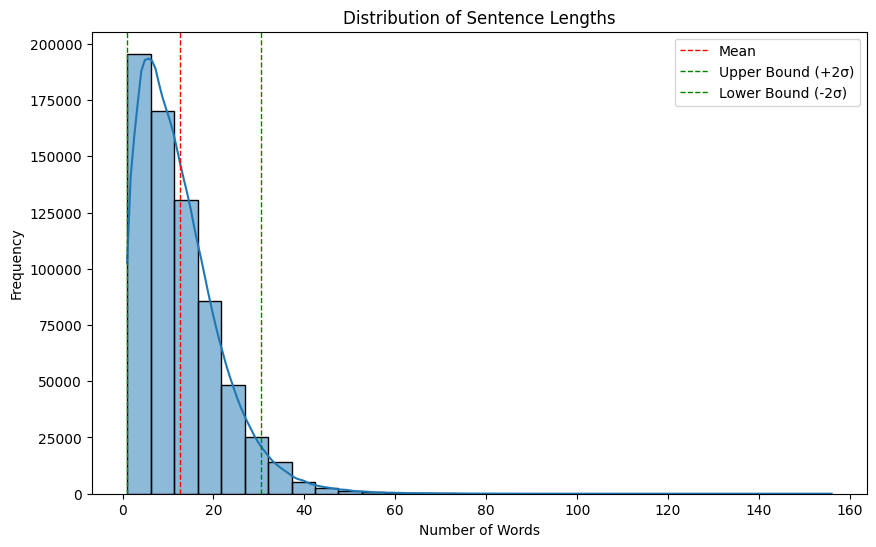

In [ ]:
# Histogram of sentence lengths with mean and bounds

plt.figure(figsize=(10,6))
sns.histplot(df['Sentence Length'], bins=30, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Add vertical lines for mean and bounds
plt.axvline(mean_sentence_length, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(upper_bound_sentence, color='green', linestyle='dashed', linewidth=1, label='Upper Bound (+2σ)')
plt.axvline(lower_bound_sentence, color='green', linestyle='dashed', linewidth=1, label='Lower Bound (-2σ)')

plt.legend()
plt.show()

In [ ]:
# Sentences with the longest lengths
longest_sentences = sentence_outliers.nlargest(5, 'Sentence Length')
print("Sentences with the Longest Lengths:")
print(longest_sentences[['Author', 'Book Title', 'Chapter', 'Sentence Length', 'Sentence']])

Sentences with the Longest Lengths:
               Author                     Book Title  Chapter  \
535352    Pippa_Grant  The Last Eligible Billionaire       14   
654949     Katy_Evans                         Tycoon       21   
308323  GT_Geissinger                   Burn for You        1   
308617  GT_Geissinger                   Burn for You        1   
308933  GT_Geissinger                   Burn for You        2   

        Sentence Length                                           Sentence  
535352              156  I made up the lie, and Hyacinth told it so man...  
654949              145  We’re groaning, kissing and groping, my back n...  
308323              142  CONTENTS ONE BIANCA TWO BIANCA THREE JACKSON F...  
308617              134  He made that masculine sound deep in his throa...  
308933              129  “He said he wanted a table, and I told him unf...  


In [ ]:
# Number of outlier sentences per author
outliers_by_author = sentence_outliers['Author'].value_counts()
print("\nNumber of Outlier Sentences per Author:")
print(outliers_by_author)


Number of Outlier Sentences per Author:
Author
Meghan_Quinn       2170
Pippa_Grant        1748
Ann_Cole           1598
GT_Geissinger      1506
Stella_Rhys        1430
Rose_Shain         1409
LJ_Shen            1369
Max_Monroe         1367
Laurelin_Paige     1335
Melanie_Harlow     1127
Ana_Huang          1107
Catharina_Maura    1062
Sara_Cate           980
Jessica_Lemmon      881
JS_Scott            819
Diane_Alberts       699
Jessica_Clare       693
Tia_Louise          687
Louise_Bay          640
LT_Swan             594
Katy_Evans          549
Annika_Martin       543
L_Steele            519
Lisa_Kleypas        511
KA_Linde            469
Sandi_Lynn          465
Sarina_Bowen        415
Penny_Wylder        385
Jennifer_Probst     367
Alexa_Riley         347
Leslie_North        324
Anne_Melody         290
Emma_Bray           247
Sam_Crescent        242
Kendra_Little       128
Name: count, dtype: int64


In [ ]:
# Number of outlier sentences per book
outliers_by_book = sentence_outliers['Book Title'].value_counts()
print("\nNumber of Outlier Sentences per Book:")
print(outliers_by_book)


Number of Outlier Sentences per Book:
Book Title
The Last Eligible Billionaire    820
So Not Meant To Be               789
A Long Time Coming               720
A Not So Meet Cute               661
Love Has a Name                  646
                                ... 
Suddenly Sexy                     54
Her Billionaire Stalker           48
Bedding the Billionaire           47
Billionaire Bad Boy               27
Devotion                          24
Name: count, Length: 105, dtype: int64


# Dealing with Outliers

* Identify sentences with unusually high word counts.
* Analyze the proportion of outliers in the dataset.
* Explore the distribution of sentence lengths.
* Review sample outlier sentences for potential data errors.
* Determine whether outliers are due to data entry issues or reflect the author's style.

In [ ]:
# Identify outlier sentences
sentence_outliers = df[(df['Sentence Length'] < lower_bound) | (df['Sentence Length'] > upper_bound)]

In [ ]:
# Count the number of outlier sentences
num_sentence_outliers = sentence_outliers.shape[0]
print(f"Number of sentence length outliers: {num_sentence_outliers}")

Number of sentence length outliers: 19190


In [ ]:
# Total number of sentences
total_sentences = df.shape[0]

# Calculate percentage
percentage_outliers = (num_sentence_outliers / total_sentences) * 100
print(f"Percentage of sentences that are outliers: {percentage_outliers:.2f}%")

Percentage of sentences that are outliers: 2.82%


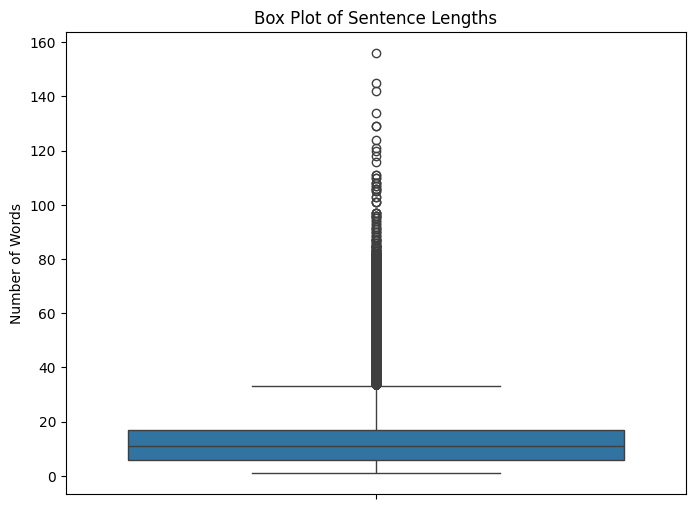

In [ ]:
# Box plot of sentence lengths
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Sentence Length'])
plt.title('Box Plot of Sentence Lengths')
plt.ylabel('Number of Words')
plt.show()

In [ ]:
# Sentences with the longest lengths
longest_sentences = sentence_outliers.nlargest(5, 'Sentence Length')
print("Sentences with the Longest Lengths:")
print(longest_sentences[['Author', 'Book Title', 'Chapter', 'Sentence Length', 'Sentence']])

Sentences with the Longest Lengths:
               Author                     Book Title  Chapter  \
552282    Pippa_Grant  The Last Eligible Billionaire       14   
263142     Katy_Evans                         Tycoon       21   
145015  GT_Geissinger                   Burn for You        1   
145309  GT_Geissinger                   Burn for You        1   
145625  GT_Geissinger                   Burn for You        2   

        Sentence Length                                           Sentence  
552282              156  I made up the lie, and Hyacinth told it so man...  
263142              145  We’re groaning, kissing and groping, my back n...  
145015              142  CONTENTS ONE BIANCA TWO BIANCA THREE JACKSON F...  
145309              134  He made that masculine sound deep in his throa...  
145625              129  “He said he wanted a table, and I told him unf...  


In [ ]:
# Number of outlier sentences per author
outliers_by_author = sentence_outliers['Author'].value_counts()
print("\nNumber of Outlier Sentences per Author:")
print(outliers_by_author)


Number of Outlier Sentences per Author:
Author
Meghan_Quinn       1563
Pippa_Grant        1392
Ann_Cole           1080
GT_Geissinger      1068
Stella_Rhys         993
Rose_Shain          963
Laurelin_Paige      941
LJ_Shen             933
Max_Monroe          891
Melanie_Harlow      752
Ana_Huang           669
Catharina_Maura     635
Sara_Cate           613
Jessica_Lemmon      530
JS_Scott            529
Diane_Alberts       476
Tia_Louise          423
Jessica_Clare       406
Louise_Bay          395
L_Steele            382
Katy_Evans          360
Annika_Martin       355
LT_Swan             334
KA_Linde            307
Sandi_Lynn          288
Lisa_Kleypas        287
Sarina_Bowen        261
Penny_Wylder        225
Jennifer_Probst     221
Alexa_Riley         201
Leslie_North        200
Emma_Bray           161
Anne_Melody         151
Sam_Crescent        137
Kendra_Little        68
Name: count, dtype: int64


In [ ]:
# Number of outlier sentences per book
outliers_by_book = sentence_outliers['Book Title'].value_counts()
print("\nNumber of Outlier Sentences per Book:")
print(outliers_by_book)


Number of Outlier Sentences per Book:
Book Title
The Last Eligible Billionaire    689
So Not Meant To Be               593
A Long Time Coming               517
Crazy for Loving You             467
A Not So Meet Cute               453
                                ... 
Suddenly Sexy                     31
Her Billionaire Stalker           28
Bedding the Billionaire           22
Billionaire Bad Boy               15
Devotion                          12
Name: count, Length: 105, dtype: int64


In [ ]:
# Examine the longest sentences
for index, row in longest_sentences.iterrows():
    author = row['Author'].replace('_', ' ')
    book_title = row['Book Title']
    chapter_number = row['Chapter']
    sentence_length = row['Sentence Length']
    sentence_text = row['Sentence']

    print(f"Author: {author}")
    print(f"Book Title: {book_title}")
    print(f"Chapter: {chapter_number}")
    print(f"Sentence Length: {sentence_length} words")
    print(f"Sentence: {sentence_text}\n")

Author: Pippa Grant
Book Title: The Last Eligible Billionaire
Chapter: 14
Sentence Length: 156 words
Sentence: I made up the lie, and Hyacinth told it so many times I started to believe it, but the truth is, I actually get seasick, and I hate that I get seasick, because I want to go cruise around the world but the one time Chad and I took a cruise, I puked on the first day and got put in quarantine in the ship’s hospital because they were afraid I had norovirus, and being in an enclosed space on a cruise ship meant that I was ill the entire trip , so I didn’t enjoy it at all, and I really, really want to learn to enjoy it, but I don’t want to puke in front of your mom and your second-grade ex-wife and your mom’s Hayes-hungry assistant, and if I’m puking, and I do fall overboard, I don’t know if I’ll actually be able to swim, because you can’t swim while you’re puking .

Author: Katy Evans
Book Title: Tycoon
Chapter: 21
Sentence Length: 145 words
Sentence: We’re groaning, kissing and gr

In [ ]:
# Threshold for sentence lengths
long_sentence_threshold = 100

# Find sentences longer than the threshold
long_sentences = df[df['Sentence Length'] > long_sentence_threshold]

print(f"\nNumber of sentences longer than {long_sentence_threshold} words: {long_sentences.shape[0]}")


Number of sentences longer than 100 words: 30


In [ ]:
# Print details of long sentences
print("\nSentences Longer than 100 Words:")
print(long_sentences[['Author', 'Book Title', 'Chapter', 'Sentence Length', 'Sentence']])


Sentences Longer than 100 Words:
                 Author                     Book Title  Chapter  \
44063          Ann_Cole                   I Choose You       19   
145015    GT_Geissinger                   Burn for You        1   
145309    GT_Geissinger                   Burn for You        1   
145375    GT_Geissinger                   Burn for You        1   
145625    GT_Geissinger                   Burn for You        2   
147437    GT_Geissinger                   Burn for You       15   
149095    GT_Geissinger                   Burn for You       27   
149812    GT_Geissinger                   Burn for You       31   
177661  Jennifer_Probst           The Marriage Bargain        1   
228587   Jessica_Lemmon      The Billionaire Next Door       28   
263142       Katy_Evans                         Tycoon       21   
293353          LJ_Shen                    The Monster        3   
371637         L_Steele    The Billionaire's Fake Wife       55   
402175   Laurelin_Paige     

In [ ]:
# Sentences with zero periods
sentences_without_periods = long_sentences[long_sentences['Period Count'] == 0]

print("\nLong Sentences Without Periods:")
print(sentences_without_periods[['Author', 'Book Title', 'Chapter', 'Sentence Length', 'Sentence']])


Long Sentences Without Periods:
               Author    Book Title  Chapter  Sentence Length  \
145625  GT_Geissinger  Burn for You        2              129   
263142     Katy_Evans        Tycoon       21              145   

                                                 Sentence  
145625  “He said he wanted a table, and I told him unf...  
263142  We’re groaning, kissing and groping, my back n...  


In [ ]:
# Ensure the DataFrame is sorted correctly
df = df.sort_values(by=['Author', 'Book Title', 'Chapter']).reset_index(drop=True)

# Assign a 'Sentence Number' within each chapter
df['Sentence Number'] = df.groupby(['Author', 'Book Title', 'Chapter']).cumcount() + 1

In [ ]:
# Calculate total sentences per chapter
sentences_per_chapter = df.groupby(['Author', 'Book Title', 'Chapter'])['Sentence'].count().reset_index(name='Total Sentences')

# Merge total sentences back into the main DataFrame
df = df.merge(sentences_per_chapter, on=['Author', 'Book Title', 'Chapter'], how='left')

In [ ]:
# For long sentences
for idx, row in long_sentences.iterrows():
    author = row['Author'].replace('_', ' ')
    book_title = row['Book Title']
    chapter_number = row['Chapter']
    sentence_number = row['Sentence Number']
    total_sentences = row['Total Sentences']
    sentence_length = row['Sentence Length']
    sentence_text = row['Sentence']

    print(f"Author: {author}")
    print(f"Book Title: {book_title}")
    print(f"Chapter: {chapter_number}")
    print(f"Sentence Number: {sentence_number} out of {total_sentences}")
    print(f"Sentence Length: {sentence_length} words")
    print(f"Sentence: {sentence_text}\n")

Author: Ann Cole
Book Title: I Choose You
Chapter: 19
Sentence Number: 41 out of 227
Sentence Length: 106 words
Sentence: “You’d get hit by a truck only because you’d be too damn drunk to remember to look up and down before you cross.” Leaving Mark with his brandy snifter turned up at his mouth, I made my way through the house and tried keeping my eyes straight ahead to ignore: the two half-naked girls tonguing each other on a couch in the living area, the three performing body shots on the floor in the hallway, and the nude Hispanic who was eyeing me as she licked her lips while I strode past her to the stairway leading down to the basement where Carlos’ studio was located.

Author: GT Geissinger
Book Title: Burn for You
Chapter: 1
Sentence Number: 9 out of 547
Sentence Length: 142 words
Sentence: CONTENTS ONE BIANCA TWO BIANCA THREE JACKSON FOUR BIANCA CREOLE SHRIMP AND GRITS FIVE JACKSON SIX BIANCA SEVEN BIANCA EIGHT BIANCA BIANCA’S OLD CUBAN NINE JACKSON TEN BIANCA ELEVEN BIANCA GI

# Using Log Scales for Skewed Data

**Histogram with Logarithmic Y-Axis**

The histogram will display the frequency of sentences for each word count bin on a logarithmic y-axis, highlighting both common and rare sentence lengths.

In [ ]:
# Calculate sentence lengths
df['Sentence Length'] = df['Sentence'].apply(lambda x: len(str(x).split()))

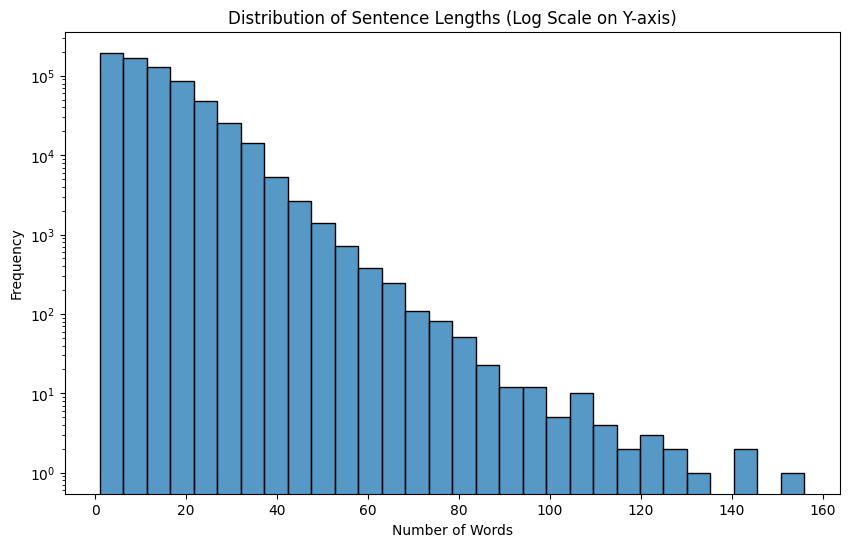

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram of sentence lengths with a logarithmic y-axis
plt.figure(figsize=(10,6))
sns.histplot(df['Sentence Length'], bins=30, kde=False)
plt.title('Distribution of Sentence Lengths (Log Scale on Y-axis)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

**Histogram of Log-Transformed Data**

The histogram shows the distribution of log-transformed sentence lengths, helping to visualize skewed data.

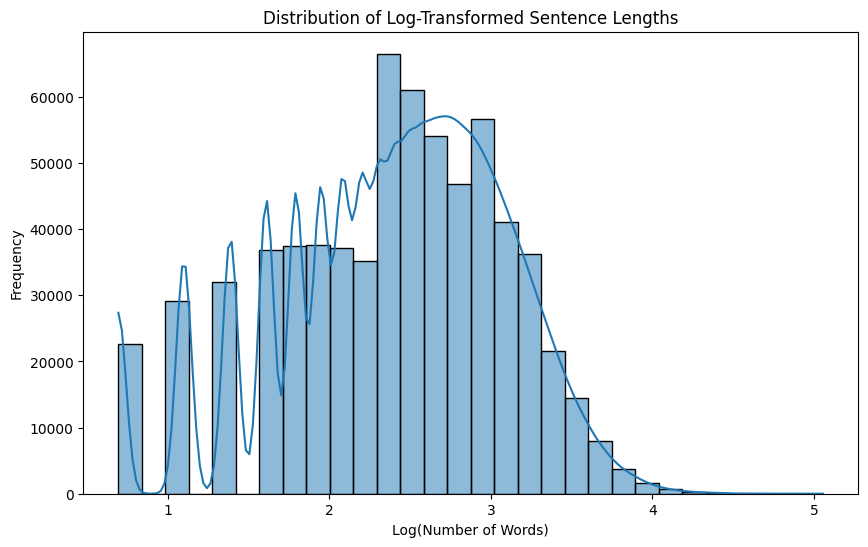

In [ ]:
import numpy as np

# Apply log transformation to the sentence lengths
df['Log Sentence Length'] = np.log1p(df['Sentence Length'])

# Plotting the histogram of log-transformed sentence lengths
plt.figure(figsize=(10,6))
sns.histplot(df['Log Sentence Length'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Sentence Lengths')
plt.xlabel('Log(Number of Words)')
plt.ylabel('Frequency')
plt.show()

**Incorporating Cumulative Distribution Functions (CDF)**

* Helps understand what proportion of sentences are below a certain length.


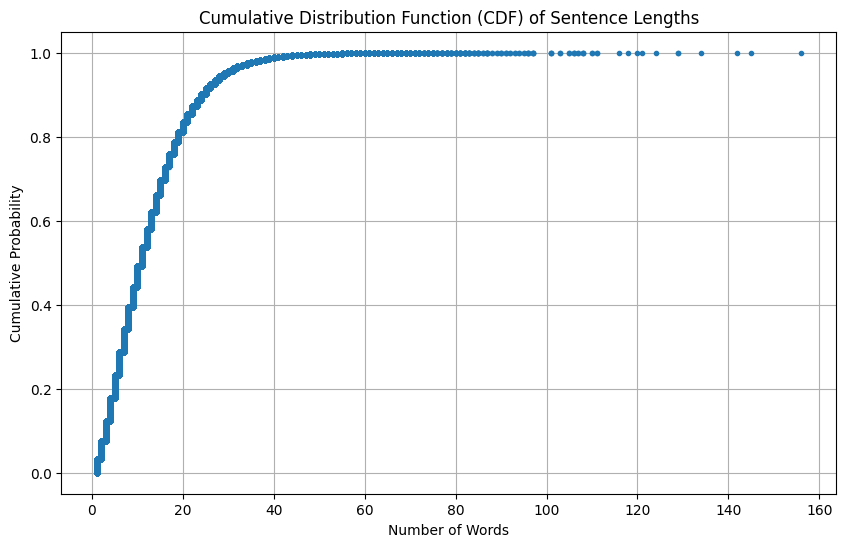

In [ ]:
# Sort the sentence lengths
sorted_lengths = np.sort(df['Sentence Length'])

# Calculate cumulative probabilities
cumulative_probs = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)

# Plot the CDF
plt.figure(figsize=(10,6))
plt.plot(sorted_lengths, cumulative_probs, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF) of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [ ]:
# Function to find proportion of sentences below a given length
def proportion_below(length):
    index = np.searchsorted(sorted_lengths, length, side='right')
    proportion = cumulative_probs[index - 1] if index > 0 else 0
    return proportion

# Example: Proportion of sentences with fewer than 20 words
threshold = 20
proportion = proportion_below(threshold)
print(f"Proportion of sentences with fewer than {threshold} words: {proportion:.2%}")

Proportion of sentences with fewer than 20 words: 83.47%


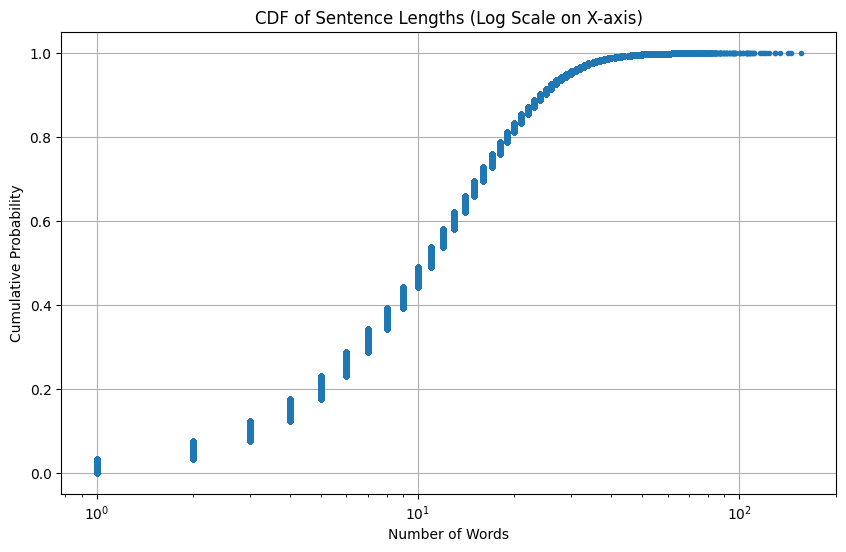

In [ ]:
# Plot the CDF with a logarithmic x-axis
plt.figure(figsize=(10,6))
plt.plot(sorted_lengths, cumulative_probs, marker='.', linestyle='none')
plt.title('CDF of Sentence Lengths (Log Scale on X-axis)')
plt.xlabel('Number of Words')
plt.ylabel('Cumulative Probability')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.grid(True)
plt.show()

# Step 5. Vocabulary Analysis

# 5.1. Total Unique Words

In [ ]:
# Combine all sentences into one corpus
corpus = ' '.join(df['Sentence'].astype(str))

In [ ]:
# Split the corpus into words
words = corpus.split()

In [ ]:
# Calculate total unique words
unique_words = set(words)
print(f'Total Unique Words: {len(unique_words)}')

Total Unique Words: 198484


# 5.2. Most Frequent Words

In [ ]:
# Get word frequencies
word_freq = Counter(words)

In [ ]:
# Display the 20 most common words
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('the', 278265), ('I', 275565), ('to', 233137), ('and', 199859), ('a', 163553), ('my', 137459), ('of', 124628), ('her', 106401), ('in', 96575), ('his', 87107), ('was', 84530), ('you', 79807), ('he', 76037), ('that', 64967), ('with', 62462), ('me', 60395), ('she', 58119), ('on', 56453), ('for', 56165), ('it', 54609)]


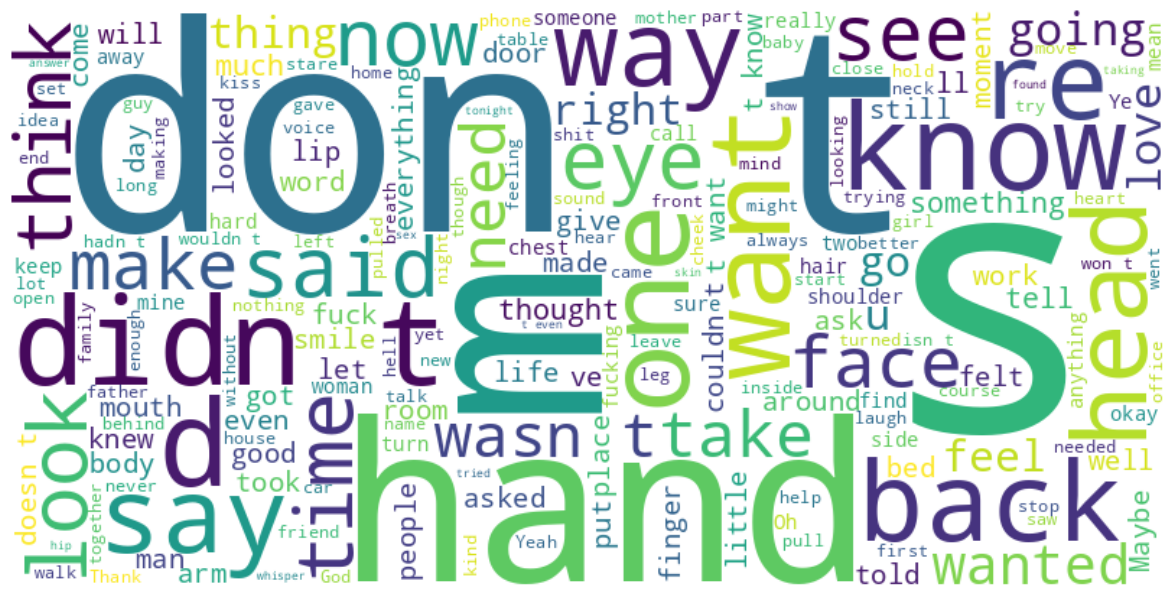

In [ ]:
# Define stopwords
stopwords = set(STOPWORDS)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(corpus)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()